In [1]:
#import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from surprise import SVD
from surprise import Reader
from surprise import Dataset
from surprise import accuracy

In [2]:
path ='../data/'

In [3]:
business_df = pd.read_json(path+'yelp_academic_dataset_business.json', lines= True)

In [11]:
reviews_df = pd.read_json(path+'yelp_academic_dataset_review.json', lines= True)

In [ ]:
users_df = pd.read_json(path+'yelp_academic_dataset_user.json', lines= True)

In [4]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


## Business Analysis

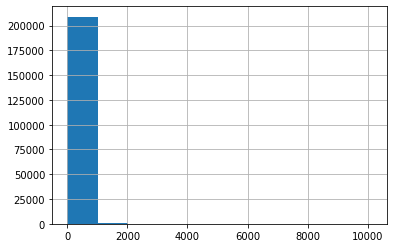

In [5]:
business_df['review_count'].hist()

In [6]:
business_df['review_count'].describe()

count    209393.000000
mean         36.937505
std         123.343597
min           3.000000
25%           4.000000
50%           9.000000
75%          27.000000
max       10129.000000
Name: review_count, dtype: float64

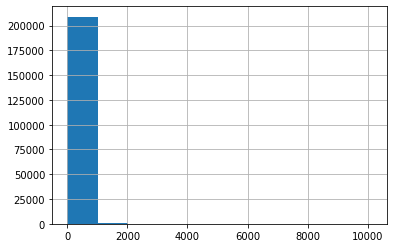

In [7]:
business_df['review_count'].hist()

## Tranform dataset to surprise

In [ ]:
reader = Reader( rating_scale = ( 1, 5 ) )

In [ ]:
train_data = Dataset.load_from_df( train_df[ [ 'user_id', 'item_id', 'rating' ] ], reader )
validation_data = Dataset.load_from_df( validation_df[ [ 'user_id', 'item_id', 'rating' ] ], reader )
test_data = Dataset.load_from_df( test_df[ [ 'user_id', 'item_id', 'rating' ] ], reader )

In [ ]:
train_data = train_data.build_full_trainset()
validation_data = validation_data.build_full_trainset()
test_data = test_data.build_full_trainset()

In [ ]:
train_data_2 = train_data.build_testset()
validation_data = validation_data.build_testset()
test_data = test_data.build_testset()

## Entrenamiento del modelo con bias

In [ ]:
svd = SVD( n_factors = 5, n_epochs = 200, biased = True, lr_all = 0.005, reg_all = 0, init_mean = 0, init_std_dev = 0.01, verbose = True )

In [ ]:
svd.fit( train_data )

## Evaluación de predicciones

In [ ]:
predictions_train = svd.test( train_data_2 )

In [ ]:
predictions_validation = svd.test( validation_data )
predictions_test = svd.test( test_data )

In [ ]:
accuracy.rmse( predictions_train, verbose = True )

In [ ]:
accuracy.rmse( predictions_validation, verbose = True )

In [ ]:
accuracy.rmse( predictions_test, verbose = True )